In [1]:
import sys

sys.path.append('..')

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from utils.dataio import *
from utils.visualization import *

DATA_DIR = '../data/'
RESULTS_PATH = '../results_new/'

In [2]:
# Load configuration file.
config = load_config('../config.yaml')

In [3]:
n_delays_df = 16
n_epochs_df = 10
lr_pg_df = 0.1
bs_df = 64

### Create Figure

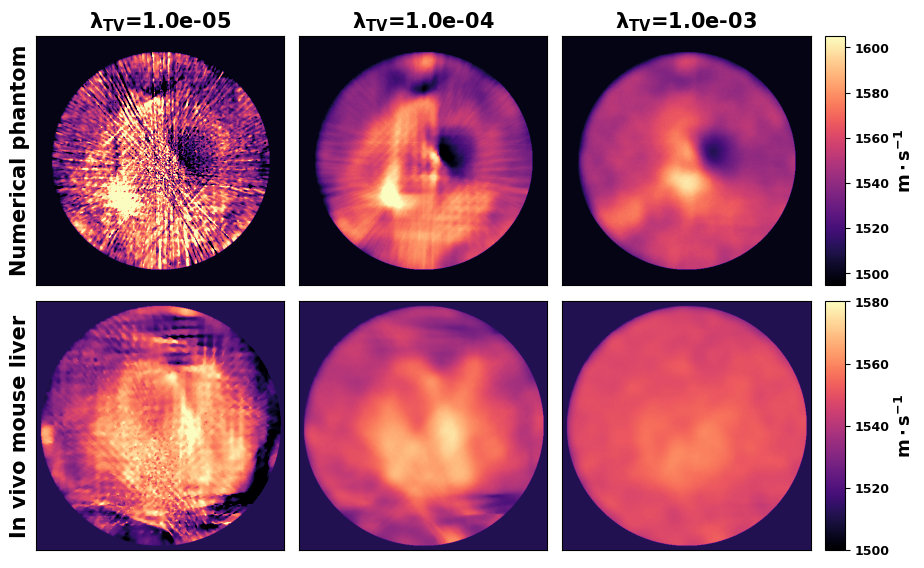

In [4]:
lam_list = [1e-5,1e-4,1e-3]

fig = plt.figure(figsize=(10,6.7))
gs = GridSpec(6,9)
for j, task in enumerate(['numerical 0', 'in_vivo']):
    task_params = config[task]
    IP_max, IP_min, SOS_max, SOS_min = task_params['IP_max'], task_params['IP_min'], task_params['SOS_max'], task_params['SOS_min']
    norm_ip = Normalize(vmax=IP_max, vmin=IP_min)
    norm_sos = Normalize(vmax=SOS_max, vmin=SOS_min)
    for i, lam in enumerate(lam_list):
        params =f'{n_delays_df}delays_TV={lam:.1e}_{n_epochs_df}epochs_bs={bs_df}_lr={lr_pg_df:.1e}'
        ip_rec = load_mat(os.path.join(RESULTS_PATH, config[task]['task'], 'PG', params, 'IP_rec.mat'))
        sos_rec = load_mat(os.path.join(RESULTS_PATH, config[task]['task'], 'PG', params, 'SOS_rec.mat'))
        ip_rec = standardize(ip_rec)
        log = load_log(os.path.join(RESULTS_PATH, config[task]['task'], 'PG', params, 'log.json'))
        
        ax = plt.subplot(gs[j*3:(j+1)*3,i*3:(i+1)*3])
        plt.imshow(sos_rec, cmap='magma', norm=norm_sos)
        plt.xticks([])
        plt.yticks([])
        
        if j == 0:
            plt.title('$\mathbf{\lambda_{TV}}$'+'={:.1e}'.format(lam), fontsize=15, fontweight='bold')
            if i == 0:
                plt.ylabel('Numerical phantom', fontsize=15, fontweight='bold')
            if (i+1) % len(lam_list) == 0:
                cax = fig.add_axes([ax.get_position().x1+0.014, ax.get_position().y0, 0.02, ax.get_position().height])
                cb = plt.colorbar(cax=cax, norm=norm_sos)
                cb.set_ticks([1500, 1520, 1540, 1560, 1580, 1600])
                cb.set_ticklabels(['1500', '1520', '1540', '1560', '1580', '1600'], fontsize=9, fontweight='bold')
                cb.set_label('$\mathbf{m \cdot s^{-1}}$', fontsize=13)
        else:
            if i == 0:
                plt.ylabel('In vivo mouse liver', fontsize=15, fontweight='bold')
            if (i+1) % len(lam_list) == 0:
                cax = fig.add_axes([ax.get_position().x1+0.014, ax.get_position().y0, 0.02, ax.get_position().height])
                cb = plt.colorbar(cax=cax, norm=norm_sos)
                cb.set_ticks([1500, 1520, 1540, 1560, 1580])
                cb.set_ticklabels(['1500', '1520', '1540', '1560', '1580'], fontsize=9, fontweight='bold')
                cb.set_label('$\mathbf{m \cdot s^{-1}}$', fontsize=13)
plt.savefig('figure_ablation_tv.png', dpi=300, bbox_inches='tight')